Prodigy Task-02

Dataset="Titanic-Dataset.csv"

In [1]:
# imoporting the libraries
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

pd.set_option("display.max_columns",100)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#basic overview

def quick_overview(x:pd.DataFrame):
    info=pd.DataFrame({
        "dtype":x.dtypes,
        "n_missing":x.isna().sum(),
        "missing_%": x.isna().mean().round(3)*100,
        "n_unique":x.nunique()
    }).sort_values("missing_%",ascending=False)
    return x.shape,info

df.shape, quick_overview(df)[1]

    

((891, 12),
                dtype  n_missing  missing_%  n_unique
 Cabin         object        687       77.1       147
 Age          float64        177       19.9        88
 Embarked      object          2        0.2         3
 PassengerId    int64          0        0.0       891
 Name          object          0        0.0       891
 Pclass         int64          0        0.0         3
 Survived       int64          0        0.0         2
 Sex           object          0        0.0         2
 Parch          int64          0        0.0         7
 SibSp          int64          0        0.0         7
 Fare         float64          0        0.0       248
 Ticket        object          0        0.0       681)

In [14]:
#duplicates and obvious fixes

dup_count=df.duplicated().sum()

df=df.drop_duplicates().copy()

for c in df.select_dtypes(include="object"):
    df[c]=df[c].astype(str).str.strip()

dup_count

np.int64(0)

In [15]:
#targets and basic distributions

df["Survived"].value_counts(normalize=True).rename("share")

Survived
0    0.616162
1    0.383838
Name: share, dtype: float64

In [16]:
df.describe(include="number")
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,148,4
top,"Dooley, Mr. Patrick",male,347082,nan,S
freq,1,577,7,687,644


In [19]:
#missing values handling

#embarked

mode_emb=df['Embarked'].mode(dropna=True)[0]

age_med=df.groupby(["Sex","Pclass"])["Age"].median()
def impute_age(row):
    if pd.isna(row['Age']):
        return age_med.loc[row["Sex"],row["Pclass"]]
    return row["Age"]

df["Age"]=df.apply(impute_age,axis=1)

if df["Fare"].isna().any():
    df["Fare"]=df["Fare"].fillna(df["Fare"].median())

df["Deck"]=df["Cabin"].str[0].fillna("U")


In [20]:
quick_overview(df)[1]

,dtype,n_missing,missing_%,n_unique
PassengerId,int64,0,0.0,891
Survived,int64,0,0.0,2
Pclass,int64,0,0.0,3
Name,object,0,0.0,891
Sex,object,0,0.0,2
Age,float64,0,0.0,89
SibSp,int64,0,0.0,7
Parch,int64,0,0.0,7
Ticket,object,0,0.0,681
Fare,float64,0,0.0,248


In [28]:
#feature engineering


df["FamilySize"]=df["SibSp"]+df["Parch"]+1
df["IsAlone"]=(df["FamilySize"]==1).astype(int)

bins=[0,12,18,30,50,80]

labels=["child","Teen","YoungAdult","Adult","Senior"]

df["AgeBand"]=pd.cut(df["Age"],bins=bins,labels=labels,right=False)


In [23]:
#target distribution check

df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [29]:
#Bivariate EDA

#Sex vs Survival

pd.crosstab(df["Sex"],df["Survived"],normalize="index").round(3)

#Pclass vs Survival

pd.crosstab(df["Pclass"],df["Survived"],normalize="index").round(3)

#AgeBand VS Survival

pd.crosstab(df["AgeBand"],df["Survived"],normalize="index").round(3)

#Embarked vs Survival

pd.crosstab(df["Embarked"],df["Survived"],normalize="index").round(3)

#familysize/IsAlone vsSurvival

pd.crosstab(df["IsAlone"],df["Survived"],normalize="index").round(3)


Survived,0,1
IsAlone,,
0,0.494,0.506
1,0.696,0.304


In [32]:
#correlation check

df.corr(numeric_only=True)["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.059579
ISAlone       -0.203367
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

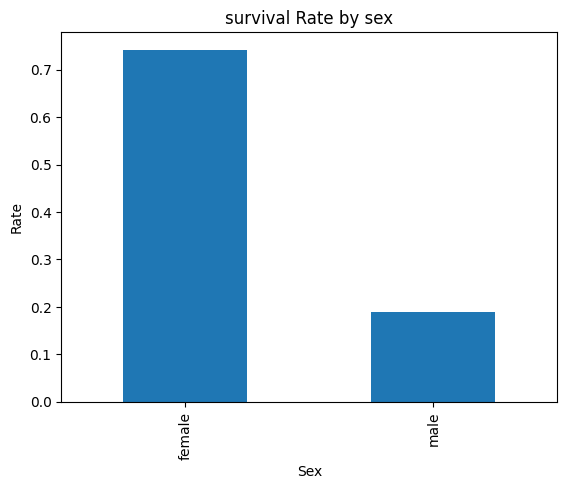

In [ ]:
#visualization


import matplotlib.pyplot as plt

#Survival by sex

pd.crosstab(df["Sex"],df["Survived"],normalize="index")[1].plot(kind="bar")
plt.title("Survival Rate by Sex")
plt.ylabel("Rate")
plt.show()






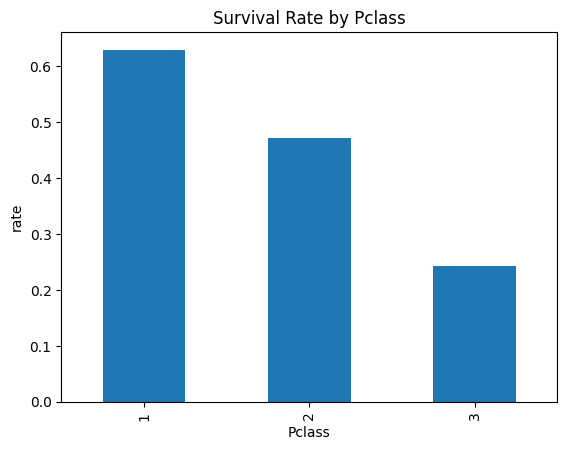

In [36]:
#Survival by Pclass
pd.crosstab(df["Pclass"],df["Survived"],normalize="index")[1].plot(kind="bar")

plt.title("Survival Rate by Pclass")
plt.ylabel("rate")
plt.show()

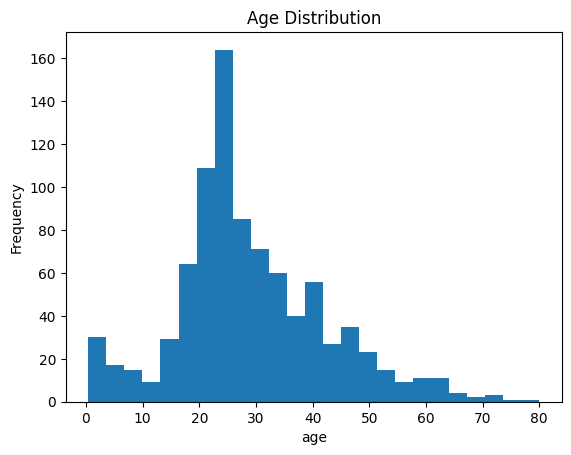

In [37]:
#age distribution

df["Age"].plot(kind="hist",bins=25)

plt.title("Age Distribution")
plt.xlabel("age")
plt.show()

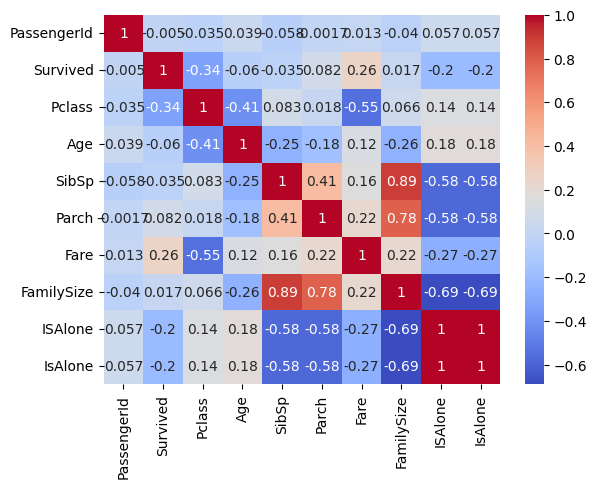

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
